In [13]:
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)

In [14]:
class Data(Dataset):
    def __init__(self, train = True):
        if train == True:
            self.x = torch.arange(-3,3,0.1).view(-1,1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            if train == True:
                self.y[50:] = 20
        else:
            self.x = torch.arange(-3,3, 0.1).view(-1,1)
            self.y = -3 * self.x + 1
            self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [15]:
trainData = Data()
valData = Data(train = False)

No handles with labels found to put in legend.


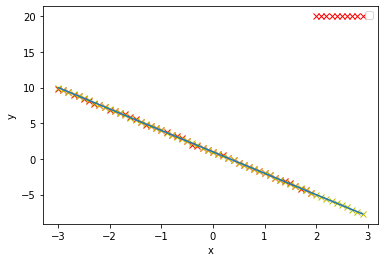

In [16]:
plt.plot(trainData.x.numpy(), trainData.y.numpy(), 'xr')
plt.plot(valData.x.numpy(), valData.y.numpy(), 'xy')
plt.plot(trainData.x.numpy(), trainData.f.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'upper right')
plt.show()
label = 'training cost'

In [17]:
from torch import nn

class linear_regression(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Predition
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [18]:
model = linear_regression(1, 1)

In [19]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.MSELoss()
trainLoader = DataLoader(dataset = trainData, batch_size=1)

In [20]:
LOSS_TRAIN = []
LOSS_VAL = []
n=1;
min_loss = 1000

def train_model_early_stopping(epochs, min_loss):
    for epoch in range(epochs):
        for x, y in trainLoader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train = criterion(model(trainData.x), trainData.y).item()
            loss_val = criterion(model(valData.x), valData.y).item()
            LOSS_TRAIN.append(loss_train)
            LOSS_VAL.append(loss_val)
            if loss_val < min_loss:
                value = epoch
                min_loss = loss_val
                torch.save(model.state_dict(), 'best_model.pt')

train_model_early_stopping(20, min_loss)

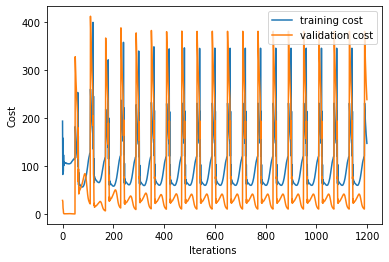

In [21]:
plt.plot(LOSS_TRAIN, label = 'training cost')
plt.plot(LOSS_VAL, label = 'validation cost')
plt.xlabel("Iterations ")
plt.ylabel("Cost")
plt.legend(loc = 'upper right')
plt.show()

In [22]:
modelBest = linear_regression(1,1)

In [23]:
modelBest.load_state_dict(torch.load('best_model.pt'))

<All keys matched successfully>

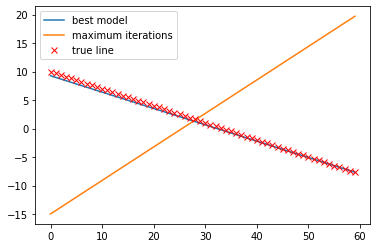

In [24]:
plt.plot(modelBest(valData.x).data.numpy(), label = 'best model')
plt.plot(model(valData.x).data.numpy(), label = 'maximum iterations')
plt.plot(valData.y.numpy(), 'rx', label = 'true line')
plt.legend()
plt.show()